In [28]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [15]:
df = sns.load_dataset("penguins")

In [16]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [17]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


<AxesSubplot:ylabel='Density'>

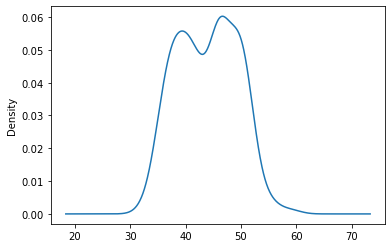

In [18]:
df.bill_length_mm.plot(kind = 'kde')

In [19]:
df.species.value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [26]:
feature_df = df.drop('sex', axis =1)
labels = df[['sex']]

In [30]:
le = LabelEncoder()

In [31]:
features_df = pd.get_dummies(feature_df)
labels = labels.apply(lambda x: le.fit_transform(x))
labels

,sex
0,1
1,0
2,0
3,2
4,0
...,...
339,2
340,0
341,1
342,0


In [36]:
features_df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen
0,39.1,18.7,181.0,3750.0,1,0,0,0,0,1
1,39.5,17.4,186.0,3800.0,1,0,0,0,0,1
2,40.3,18.0,195.0,3250.0,1,0,0,0,0,1
3,NaN,NaN,NaN,NaN,1,0,0,0,0,1
4,36.7,19.3,193.0,3450.0,1,0,0,0,0,1


In [38]:
X_train, X_test, y_train, y_test = train_test_split(features_df,labels, test_size = .2)


In [68]:
model = XGBClassifier(n_estimators =10, max_depth =2, objective = 'multi:softmax', num_class = 3)
model.fit(X_train, y_train,eval_set = [(X_train,y_train),(X_test,y_test)])

[0]	validation_0-mlogloss:0.89357	validation_1-mlogloss:0.92654
[1]	validation_0-mlogloss:0.71701	validation_1-mlogloss:0.75135
[2]	validation_0-mlogloss:0.60905	validation_1-mlogloss:0.65008
[3]	validation_0-mlogloss:0.53252	validation_1-mlogloss:0.58970
[4]	validation_0-mlogloss:0.47365	validation_1-mlogloss:0.53023
[5]	validation_0-mlogloss:0.43045	validation_1-mlogloss:0.49346
[6]	validation_0-mlogloss:0.39690	validation_1-mlogloss:0.45318
[7]	validation_0-mlogloss:0.37068	validation_1-mlogloss:0.44193
[8]	validation_0-mlogloss:0.35093	validation_1-mlogloss:0.42037
[9]	validation_0-mlogloss:0.33044	validation_1-mlogloss:0.40435


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
              num_class=3, num_parallel_tree=1, objective='multi:softmax',
              predictor='auto', random_state=0, ...)

In [69]:
from sklearn.metrics import f1_score

In [70]:
f1_score(y_test, model.predict(X_test))

0.9156626506024097

In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, model.predict(X_test))

0.8985507246376812

In [72]:
import pickle

In [73]:
model.save_model('xgb_class.json')

In [76]:
import xgboost

In [77]:
xgb_clf = xgboost.XGBClassifier()
xgb_clf.load_model("xgb_class.json")

In [82]:
p1 = model.predict(X_test)
p2 = xgb_clf.predict(xgboost.DMatrix(X_test)).astype(int)
print(p1[:10])
print(p2[:10])

[1 1 1 0 1 1 1 0 0 1]
[1 1 1 0 1 1 1 0 0 1]
